In [163]:
from Bio import SeqIO, AlignIO, Phylo

from Bio.Seq import Seq

from Bio.SeqRecord import SeqRecord

from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

import matplotlib.pyplot as plt

Ejercicio 1

In [164]:
ruta="./"
#Guardamos la ruta donde se encuentra el archivo

In [165]:
#Abrimos el archivo con la informacion en formato GenBank del mRNA de nuestro gen de interes
with open(ruta+"factorXIII.gb") as input_handle:
    for record in SeqIO.parse(input_handle, "genbank"):
        secuencia=record.seq
        print(record)

ID: NM_000132.4
Name: NM_000132
Description: Homo sapiens coagulation factor VIII (F8), transcript variant 1, mRNA
Number of features: 74
/molecule_type=mRNA
/topology=linear
/data_file_division=PRI
/date=14-AUG-2023
/accessions=['NM_000132']
/sequence_version=4
/keywords=['RefSeq', 'MANE Select']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='Mechano-covalent protection of coagulation factor VIII by von Willebrand factor', ...), Reference(title='Factor VIII mutated with Lys1813Ala within the factor IXa-binding region enhances intrinsic coagulation potential', ...), Reference(title='Translational readthrough at F8 nonsense variants in the factor VIII B domain contributes to residual expression and lowers inhibitor association', ...), Reference(title='Heterogen

In [166]:
#Buscamos los 6 Marcos de Lectura posibles, y los guardamos en la matriz MLS
ML1=secuencia.translate()
ML2=secuencia[1:].translate()
ML3=secuencia[2:].translate()
ML4=secuencia.reverse_complement().translate()
ML5=secuencia.reverse_complement()[1:].translate()
ML6=secuencia.reverse_complement()[2:].translate()
MLS=[ML1,ML2,ML3,ML4,ML5,ML6]

/Users/martunudelman/Library/Python/3.9/lib/python/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [167]:
for ML in MLS:
  print(ML)

A*C*AHPVGKVP*NALQRNWDFSLNQKFYFFPLLGAKDILEKN*PFASPVEHL*Q*VMQIELSTCFFLCLLRFCFSATRRYYLGAVELSWDYMQSDLGELPVDARFPPRVPKSFPFNTSVVYKKTLFVEFTDHLFNIAKPRPPWMGLLGPTIQAEVYDTVVITLKNMASHPVSLHAVGVSYWKASEGAEYDDQTSQREKEDDKVFPGGSHTYVWQVLKENGPMASDPLCLTYSYLSHVDLVKDLNSGLIGALLVCREGSLAKEKTQTLHKFILLFAVFDEGKSWHSETKNSLMQDRDAASARAWPKMHTVNGYVNRSLPGLIGCHRKSVYWHVIGMGTTPEVHSIFLEGHTFLVRNHRQASLEISPITFLTAQTLLMDLGQFLLFCHISSHQHDGMEAYVKVDSCPEEPQLRMKNNEEAEDYDDDLTDSEMDVVRFDDDNSPSFIQIRSVAKKHPKTWVHYIAAEEEDWDYAPLVLAPDDRSYKSQYLNNGPQRIGRKYKKVRFMAYTDETFKTREAIQHESGILGPLLYGEVGDTLLIIFKNQASRPYNIYPHGITDVRPLYSRRLPKGVKHLKDFPILPGEIFKYKWTVTVEDGPTKSDPRCLTRYYSSFVNMERDLASGLIGPLLICYKESVDQRGNQIMSDKRNVILFSVFDENRSWYLTENIQRFLPNPAGVQLEDPEFQASNIMHSINGYVFDSLQLSVCLHEVAYWYILSIGAQTDFLSVFFSGYTFKHKMVYEDTLTLFPFSGETVFMSMENPGLWILGCHNSDFRNRGMTALLKVSSCDKNTGDYYEDSYEDISAYLLSKNNAIEPRSFSQNSRHPSTRQKQFNATTIPENDIEKTDPWFAHRTPMPKIQNVSSSDLLMLLRQSPTPHGLSLSDLQEAKYETFSDDPSPGAIDSNNSLSEMTHFRPQLHHSGDMVFTPESGLQLRLNEKLGTTAATELKKLDFKVSSTSNNLISTIPSDNLAAGTDNTSSLGPPSMPVHYDSQLDTTLFGK

In [168]:
#Buscamos los inicios y finales de los codones para cada uno de los 6 marco de lecturas y los cortamos
def trads(ML):
  arranco=False
  lista=[]
  for i in range(len(ML)):
    if ML[i]=='M' and not(arranco):
      inicio=i
      arranco=True
    if ML[i]=="*" and arranco:
      fin=i
      arranco=False
      trad=ML[inicio:fin]
      lista.append(trad)
  return(lista) #Guardamos los distintos codones de cada marco de lectura en el archivo "lista"

In [169]:
#Ordenamos segun su tamaño las traducciónes de los 6 marcos de lectura dentro de la matriz, comenzando con el mas grande
MLSt=[sorted(trads(MLS[i]), key=len, reverse=True) for i in range(len(MLS))]

In [170]:
print(MLSt)

[[Seq('MQIELSTCFFLCLLRFCFSATRRYYLGAVELSWDYMQSDLGELPVDARFPPRVP...DLY'), Seq('MAKKENDDDIRLLKDIHLIFLWKYEENPWLSEIGDTNFVILIMHSVYSLPLLISC'), Seq('MLEYFLIILLDPYLTSLETIT'), Seq('MKAFFPEKLGLSESPLPLL'), Seq('MQMCIFLTSVHRYKAIWS'), Seq('MTTQNLLIVKGAGDKDKL'), Seq('MMQVQMVYSPVKFLKFRG'), Seq('MRGTFLSPKLAFLN'), Seq('MNKLFCFIAR'), Seq('MQLLKALK'), Seq('MKEKWIPI'), Seq('MGFKNP'), Seq('MERIQ'), Seq('MKL')], [Seq('MSSCFLYLMRTEAGTSQRIYNAFSPIQLECSLRIQSSKPPTSCTASMAMFLIVC...GTF'), Seq('MIQWSLHLRTWLPILSVFMLLVYPTGKLLRELNMMIRPVKGRKKMIKSSLVEAIHMSGRS'), Seq('MKTSILFISVDMCSLYEKKRSIKWHCTISIQVFLRQWKCYHPKLEFGGWNALLASIYMLG'), Seq('MRKIRGKEQNLEKTLSSLMKPKLTFGKCNIIWHPLKMSLTAKPGLISLMLTWKKMCTQA'), Seq('MKKRKTMMMILLILKWMWSGLMMTTLLPLSKFAQLPRSILKLGYITLLLKRRTGTMLP'), Seq('MEQSMFQDQINTILESKGKSFGQSAKWREYNNYYSKVCFCFLTHRYNYVI'), Seq('MALSGLVGSTKKSDLWHTQMKPLRLVKLFSMNQESWDLYFMGKLETHC'), Seq('MRRRKGPLLSLPYQIALRGVIASLKQIDLHYPLQRYHHFHLLDLYI'), Seq('MVLFPVMFNLIILFWHSFPIDYIHLYFSNVHGTSSFIFLLVSSVMS'), Seq('MRPKAGTSLKIWKETAGLPAISRWKIPLLKRIIA

In [171]:
#Buscamos la traducción más larga para cada marco de lectura. Esto nos dará la pauta de cual es la traducción correcta más probable
for i in range(len(MLSt)):
  print("El largo de la traducción más larga del marco de lectura", i+1,"es:", len(MLSt[i][0]))
  if i==0:
    print("-> El largo de la segunda traducción más larga del marco de lectura", i+1,"es:", len(MLSt[i][1]))

El largo de la traducción más larga del marco de lectura 1 es: 2351
-> El largo de la segunda traducción más larga del marco de lectura 1 es: 55
El largo de la traducción más larga del marco de lectura 2 es: 68
El largo de la traducción más larga del marco de lectura 3 es: 124
El largo de la traducción más larga del marco de lectura 4 es: 61
El largo de la traducción más larga del marco de lectura 5 es: 47
El largo de la traducción más larga del marco de lectura 6 es: 70


In [172]:
#Imprimimos la traducción del marco de lectura 1 ya que es la mas larga, por lo que probablemente sea la correcta (lo verificaremos con un blast luego)
print(MLSt[0][0])

MQIELSTCFFLCLLRFCFSATRRYYLGAVELSWDYMQSDLGELPVDARFPPRVPKSFPFNTSVVYKKTLFVEFTDHLFNIAKPRPPWMGLLGPTIQAEVYDTVVITLKNMASHPVSLHAVGVSYWKASEGAEYDDQTSQREKEDDKVFPGGSHTYVWQVLKENGPMASDPLCLTYSYLSHVDLVKDLNSGLIGALLVCREGSLAKEKTQTLHKFILLFAVFDEGKSWHSETKNSLMQDRDAASARAWPKMHTVNGYVNRSLPGLIGCHRKSVYWHVIGMGTTPEVHSIFLEGHTFLVRNHRQASLEISPITFLTAQTLLMDLGQFLLFCHISSHQHDGMEAYVKVDSCPEEPQLRMKNNEEAEDYDDDLTDSEMDVVRFDDDNSPSFIQIRSVAKKHPKTWVHYIAAEEEDWDYAPLVLAPDDRSYKSQYLNNGPQRIGRKYKKVRFMAYTDETFKTREAIQHESGILGPLLYGEVGDTLLIIFKNQASRPYNIYPHGITDVRPLYSRRLPKGVKHLKDFPILPGEIFKYKWTVTVEDGPTKSDPRCLTRYYSSFVNMERDLASGLIGPLLICYKESVDQRGNQIMSDKRNVILFSVFDENRSWYLTENIQRFLPNPAGVQLEDPEFQASNIMHSINGYVFDSLQLSVCLHEVAYWYILSIGAQTDFLSVFFSGYTFKHKMVYEDTLTLFPFSGETVFMSMENPGLWILGCHNSDFRNRGMTALLKVSSCDKNTGDYYEDSYEDISAYLLSKNNAIEPRSFSQNSRHPSTRQKQFNATTIPENDIEKTDPWFAHRTPMPKIQNVSSSDLLMLLRQSPTPHGLSLSDLQEAKYETFSDDPSPGAIDSNNSLSEMTHFRPQLHHSGDMVFTPESGLQLRLNEKLGTTAATELKKLDFKVSSTSNNLISTIPSDNLAAGTDNTSSLGPPSMPVHYDSQLDTTLFGKKSSPLTESGGPLSLSEENNDSKLLESGLMNSQESSWGKNVSSTESGRLFKGKRAHGP

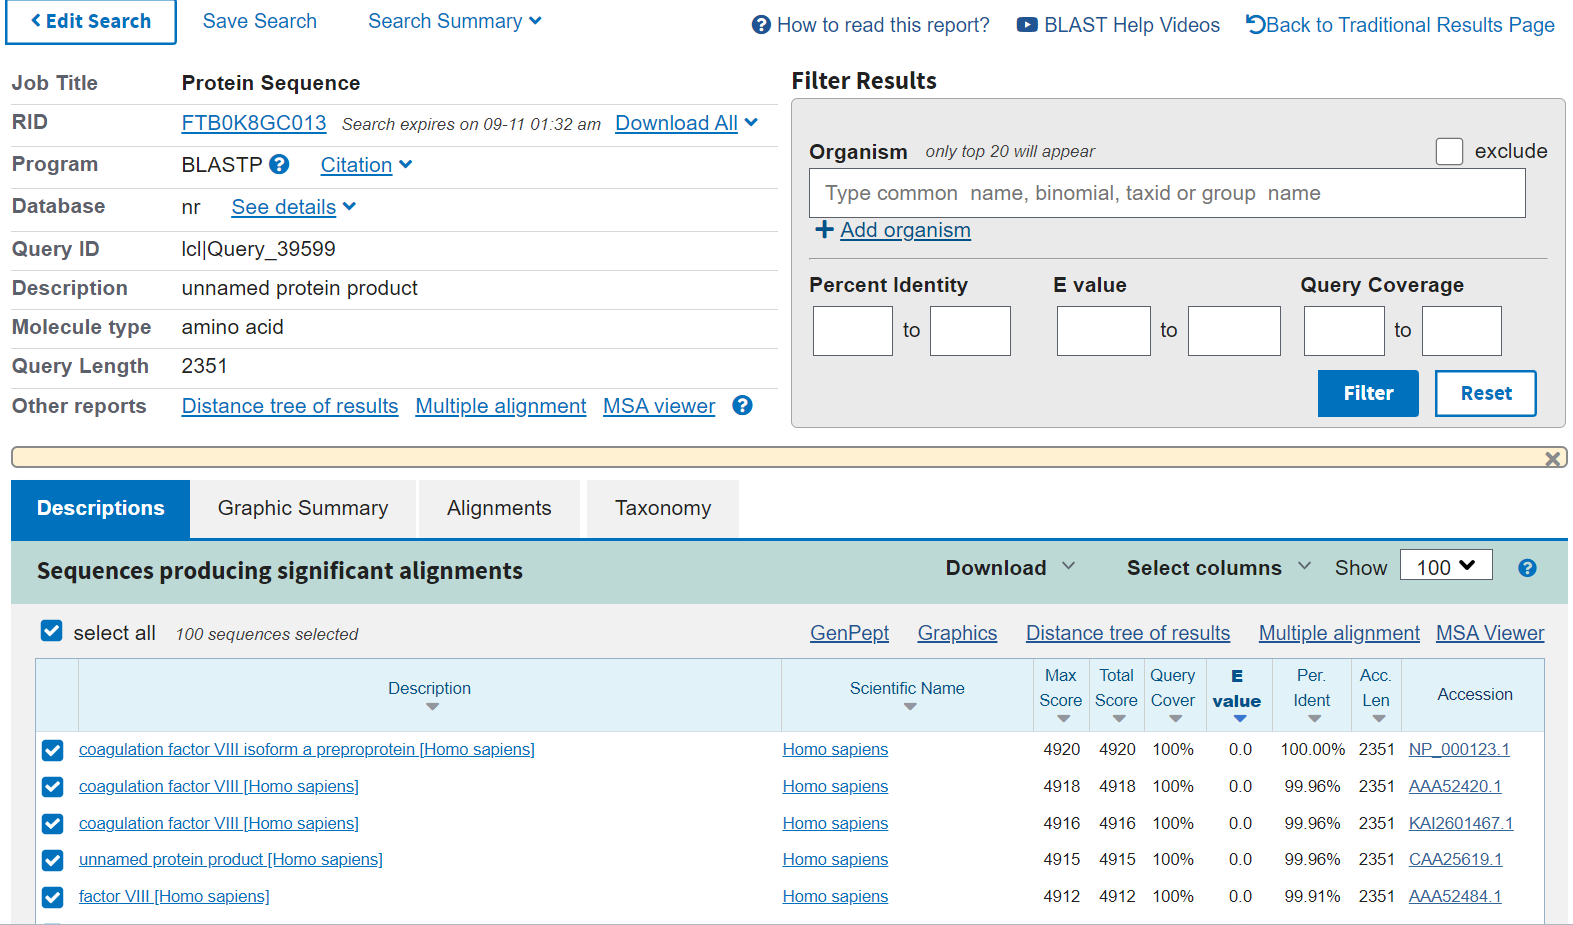

In [173]:
factor8p=MLSt[0][0]

In [174]:
#Generamos el formato del archivo fasta de la traducción más larga de cada marco de lectura
my_records = [SeqRecord(
    MLSt[i][0],
    id="ML"+str(i+1),
    description="Marco de lectura "+str(i+1),
) for i in range(len(MLSt))]

In [175]:
#Guardamos el archivo fasta
SeqIO.write(my_records, "SecuenciasTraducidas.faa", "fasta")

6

https://www.youtube.com/watch?v=BipqHNoB2fE
https://github.com/lanadominkovic/12-days-of-biopython/blob/main/12_days_of_biopython/day_04/day_04-blast_biopython.ipynb

Ejercicio 2

In [158]:
# Ahora vamos a realizar el BLAST para las distintas secuencias obtenidas a partir de los 6 marcos de lectura (únicamente la traducción mas larga). 
# Guardamos el resultado de los Blast en un Reporte Blast del formato blast.out para cada marco de lectura
# Verificaremos si efectivamente la traducción del primer marco de lectura (traducción más larga) fue la correcta

from Bio.Blast import NCBIWWW, NCBIXML
import io

def realizarBlast(marcodelectura, nombre_archivo):
    # Realiza la búsqueda BLAST
    result_handle = NCBIWWW.qblast("blastp", "nr", marcodelectura)

    # Lee los resultados del BLAST y almacénalos en una variable
    blast_results_String = result_handle.read()

    # Lo guarda como File para Parsearlo
    result_file = io.StringIO(blast_results_String)

    # Parsea la respuesta del BLAST como XML
    blast_records = NCBIXML.parse(result_file)

    #E_VALUE_THRESH = 0.00000000001
    count = 0

    # Itera a través de los registros BLAST
    for blast_record in blast_records:
        for alignment in blast_record.alignments:
            for hsp in alignment.hsps:
                #if hsp.expect < E_VALUE_THRESH:
                if count < 100:
                    count += 1
                    print("****Alignment****")
                    print("sequence:", alignment.title)
                    print("length:", alignment.length)
                    print(hsp.query[0:75] + "...")
                    print(hsp.match[0:75] + "...")
                    print(hsp.sbjct[0:75] + "...")
                    print()

    print(f"Hay {count} secuencias similares en la salida de Blast")

    # Guardar los resultados en un archivo específico
    with open(nombre_archivo, "w") as blast_out_file:
        blast_out_file.write(blast_results_String)

    print(f"Resultados del BLAST guardados en '{nombre_archivo}'")

# Realizar el BLAST para cada secuencia y guardar los resultados en archivos separados
for i, secuencia in enumerate(MLSt, start=1):
    nombre_archivo = f"blast_{i}.out"  # Nombre del archivo de salida
    print(f"Resultado del BLAST para la traducción más larga del marco de lectura {i}")
    realizarBlast(secuencia[0], nombre_archivo)
    print("--------------------------------------------------------------------------")


Resultado del BLAST para la traducción más larga del marco de lectura 1
****Alignment****
sequence: ref|NP_000123.1| coagulation factor VIII isoform a preproprotein [Homo sapiens] >sp|P00451.1| RecName: Full=Coagulation factor VIII; AltName: Full=Antihemophilic factor; Short=AHF; AltName: Full=Procoagulant component; Contains: RecName: Full=Factor VIIIa heavy chain, 200 kDa isoform; Contains: RecName: Full=Factor VIIIa heavy chain, 92 kDa isoform; Contains: RecName: Full=Factor VIII B chain; Contains: RecName: Full=Factor VIIIa light chain; Flags: Precursor [Homo sapiens] >gb|AAI66700.1| Coagulation factor VIII, procoagulant component [synthetic construct] >gb|AAA52485.1| preprocoagulation factor VIII:C [Homo sapiens] >gb|AAV85964.1| coagulation factor VIII, procoagulant component (hemophilia A) [Homo sapiens] >gb|ABV90866.1| coagulation factor VIII [synthetic construct] >prf||1012296A factor VIII [Homo sapiens]
length: 2351
MQIELSTCFFLCLLRFCFSATRRYYLGAVELSWDYMQSDLGELPVDARFPPRVPKSFPFNT

Ejercico 3

In [120]:
from Bio.Blast import NCBIWWW, NCBIXML
from Bio import Entrez, SeqIO, AlignIO
import io

# Configura tu dirección de correo electrónico para Entrez
Entrez.email = "mnudelman@itba.edu.ar"

# Definir la secuencia de consulta y los parámetros de búsqueda BLAST
secuencia_consulta = MLSt[0][0]
numero_resultados = 10
base_de_datos = "nucleotide"

# Realizar una búsqueda BLAST en línea
resultados_blast = NCBIWWW.qblast("blastp", base_de_datos, secuencia_consulta, hitlist_size=numero_resultados)

# Analizar los resultados de BLAST
blast_records = NCBIXML.read(resultados_blast)

# Descargar las secuencias de los 10 mejores resultados de BLAST
secuencias_descargadas = []
for alignment in blast_records.alignments[:numero_resultados]:
    gi_number = alignment.hit_id.split("|")[1]
    handle = Entrez.efetch(db=base_de_datos, id=gi_number, rettype="fasta", retmode="text")
    secuencia = SeqIO.read(handle, "fasta")
    secuencias_descargadas.append(secuencia)

# Agregar la secuencia de consulta a la lista de secuencias descargadas
secuencia_consulta = SeqIO.read(io.StringIO(f">Consulta\n{secuencia_consulta}\n"), "fasta")
secuencias_descargadas.append(secuencia_consulta)

# Crear una lista de registros de secuencia (SeqRecord) para todas las secuencias
registros = [secuencia_consulta] + secuencias_descargadas

# Realizar el alineamiento múltiple
alineamiento = AlignIO.MultipleSeqAlignment(registros)

# Guardar el alineamiento en formato FASTA
with open("alineamiento.fasta", "w") as output_file:
    AlignIO.write(alineamiento, output_file, "fasta")

print("Alineamiento múltiple completado y guardado en formato FASTA en: 'alineamiento.fasta'.")

# Guardar el alineamiento en formato MSA (clustal)
with open("alineamiento.clustal", "w") as output_file:
    AlignIO.write(alineamiento, output_file, "clustal")

print("Alineamiento múltiple completado y guardado en formato CLUSTAL en: 'alineamiento.clustal'.")

alignment = AlignIO.read(open("alineamiento.clustal"), "clustal")
print("Alignment length %i" % alignment.get_alignment_length())
for record in alignment:
    print(record.seq + " " + record.id)


Alineamiento múltiple completado y guardado en formato FASTA en: 'alineamiento.fasta'.
Alineamiento múltiple completado y guardado en formato CLUSTAL en: 'alineamiento.clustal'.
Alignment length 2351
MQIELSTCFFLCLLRFCFSATRRYYLGAVELSWDYMQSDLGELPVDARFPPRVPKSFPFNTSVVYKKTLFVEFTDHLFNIAKPRPPWMGLLGPTIQAEVYDTVVITLKNMASHPVSLHAVGVSYWKASEGAEYDDQTSQREKEDDKVFPGGSHTYVWQVLKENGPMASDPLCLTYSYLSHVDLVKDLNSGLIGALLVCREGSLAKEKTQTLHKFILLFAVFDEGKSWHSETKNSLMQDRDAASARAWPKMHTVNGYVNRSLPGLIGCHRKSVYWHVIGMGTTPEVHSIFLEGHTFLVRNHRQASLEISPITFLTAQTLLMDLGQFLLFCHISSHQHDGMEAYVKVDSCPEEPQLRMKNNEEAEDYDDDLTDSEMDVVRFDDDNSPSFIQIRSVAKKHPKTWVHYIAAEEEDWDYAPLVLAPDDRSYKSQYLNNGPQRIGRKYKKVRFMAYTDETFKTREAIQHESGILGPLLYGEVGDTLLIIFKNQASRPYNIYPHGITDVRPLYSRRLPKGVKHLKDFPILPGEIFKYKWTVTVEDGPTKSDPRCLTRYYSSFVNMERDLASGLIGPLLICYKESVDQRGNQIMSDKRNVILFSVFDENRSWYLTENIQRFLPNPAGVQLEDPEFQASNIMHSINGYVFDSLQLSVCLHEVAYWYILSIGAQTDFLSVFFSGYTFKHKMVYEDTLTLFPFSGETVFMSMENPGLWILGCHNSDFRNRGMTALLKVSSCDKNTGDYYEDSYEDISAYLLSKNNAIEPRSFSQNSRHPSTRQKQFNATTIPENDIEKTDPWFAHRTPMPK